<a href="https://colab.research.google.com/github/saraisabella0206-ctrl/INTEGRACION-DE-DATOS-Y-PROSPECTIVA-/blob/main/Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto 2: Integración de datos - Teoría de la credibilidad -  FINTECH**

Partiendo de las bases de datos "1.FallasTecnologicas.xslx" y "2.AdmonEjecProcesos.xslx" pertenecientes a una FINTECH, en este espacio de trabajo se plantea como caso de estudio el análisis de la integración de ambas bases de datos.

Para ello, en primer lugar, se lleva a cabo la caracterización de la distribución agregada de las pérdidas (LDA) para las bases de datos de integración utilizando las métricas de tendencia central y dispersión (Media, Desviación, Coeficiente de asimetría, Kurtosis). Posteriormente, se estima la credibilidad de la base de datos externa con respecto a la base de datos interna, para finalmente, integrar ambas bases de datos y llevar a cabo la caracterización de la distribución agregada de las pérdidas tras la integración.



0. Cargo librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd #Librería para manejo datos
import seaborn as sns #Librería para el trabajo estadístico
import matplotlib.pyplot as plt #Librería

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Cargo archivos de trabajo y calculo la distribucción agregada de las pérdidas (LDA)

In [ ]:
#------------------------------------------------------------------------------------------------------------
#1. Aquí se carga la base de datos interna (Datos Observados - Fallas Tecnológicas)
nxl='/content/drive/MyDrive/Colab Notebooks/Excels/1. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.head(10)


Freq=XDB.iloc[:,3] #Transacciones fallidas
Sev=XDB.iloc[:,4] #Cuánto me cuestan esos fallos
LDA=Freq*Sev

#-------------------------------------------------------------------------------------------------------------
#Aquí se carga la base de datos externa (Datos Externos - AdmonEjecProcesos)
nxle= '/content/drive/MyDrive/Colab Notebooks/Excels/2. AdmonEjecProcesos.xlsx'
XDBe=pd.read_excel(nxle, sheet_name=0)
XDBe.head(10)

Freqe=XDBe.iloc[:,3]
Seve=XDBe.iloc[:,4]
LDAe=Freqe*Seve



2. Creo función en Phyton que me permita analizar y “caracterizar” una variable numérica (llamada LDA) a partir de su distribución.

In [ ]:
def caracterizacion(LDA):

  #Se procede con la creación de la distribución
  plt.figure(figsize=(10,5))
  sns.histplot(LDA,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  #Se procede con la caracterización de cada una de las variables
  np.set_printoptions(suppress=True)
  NI=10    #Indica el número de clusters
  counts,bin_edges=np.histogram(LDA,bins=NI)
  print("El número de datos por intervalo es:")
  print(counts)
  print("Los intervalos inferiores:")
  print(bin_edges[:-1])
  print("Los intervalos superiores:")
  print(bin_edges[1:])
  XC=(bin_edges[:-1]+bin_edges[1:])/2

  #Se configura la tabla de los datos
  Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
  df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
  df.head(10)

  #Se procede con la estimación de la media
  fr=counts/np.sum(counts)
  u=np.sum(XC*fr)
  sigma2=np.sum(fr*(XC-u)**2)
  sigma=np.sqrt(sigma2)
  Cas=np.sum(fr*(XC-u)*3)/sigma*3
  Kur=(np.sum(fr*(XC-u)*4)/sigma*4)-3

  return u,sigma,Cas,Kur,df

3. Comparación estadística entre las dos variables (Media, Varianza, Desviación, Asimetría, Kurtosis)

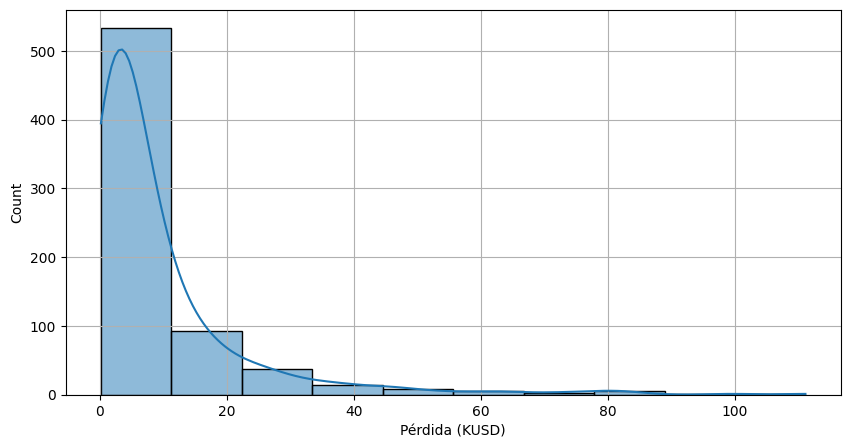

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
Los intervalos superiores:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]
La media de los datos observados es: 11.07019634094151
La desviación de los datos observados es: 13.044113210589247
El coeficiente de asimetría de los datos observados es: 4.0854218544152143e-16
La kurtosis de los datos observados es: -2.999999999999999


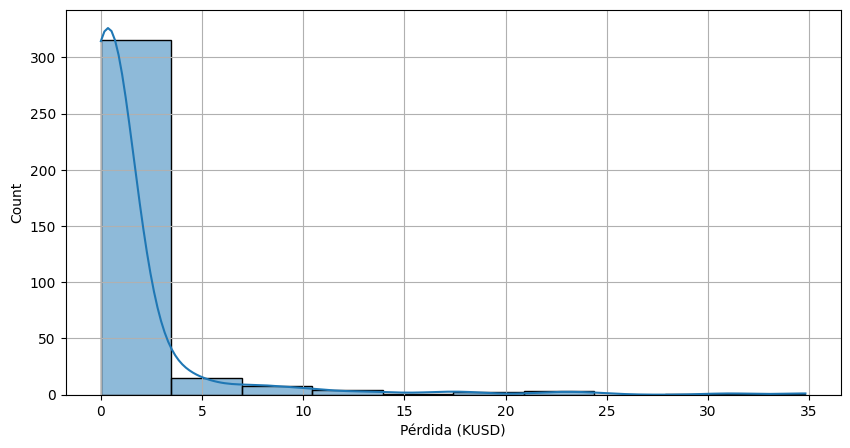

El número de datos por intervalo es:
[315  15   8   4   1   2   3   0   1   1]
Los intervalos inferiores:
[ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
Los intervalos superiores:
[ 3.48221562  6.96443124 10.44664686 13.92886248 17.4110781  20.89329372
 24.37550933 27.85772495 31.33994057 34.82215619]
La media de los datos externos es: 2.656433058055811
La desviación de los datos externos es: 3.6179492178130417
El coeficiente de asimetría de los datos externos es: 5.983873094072071e-16
La kurtosis de los datos externos es: -2.999999999999999


In [ ]:
#3.1.Bases de datos Observados (Fallas Tecnológicas)
uo,sigmao,Caso, Kuo,dfo = caracterizacion(LDA)
print("La media de los datos observados es:",uo)
print("La desviación de los datos observados es:", sigmao)
print("El coeficiente de asimetría de los datos observados es:", Caso)
print("La kurtosis de los datos observados es:", Kuo)


#3.2.Bases de datos Externas (AdmonEjecProcesos)
ue,sigmae,Cae,Kue,dfe = caracterizacion(LDAe)
print("La media de los datos externos es:",ue)
print("La desviación de los datos externos es:", sigmae)
print("El coeficiente de asimetría de los datos externos es:", Cae)
print("La kurtosis de los datos externos es:", Kue)


4. Teoría de la credibilidad

In [ ]:
#4.1. Media hipotética
NDo=len(LDA) #Número de datos observados - Para saber la inercia de los datos
NDe=len(LDAe)
uhat=(uo*NDo+ue*NDe)/(NDo+NDe)

#4.2. EPV: Valor esperado de la varianza (que tanto varían los datos)
EPV=(NDo*sigmao**2+NDe*sigmae**2)/(NDo+NDe) #Determinar la varianza conjunta de los datos

#4.3. VHM: Varianza Hipotética de la Media
VHM=((NDo*uo**2+NDe*ue**2)/(NDo+NDe))-(uhat**2)

#4.4. Factor de credibilidad
fc=EPV/VHM


#4.5. Credibilidad de la base de datos
Cr=NDo/(NDo+fc)
print("La credibilidad de los datos observados es:", Cr)

Cr2=1 - (NDo/(NDo+fc) )
print("La credibilidad de los datos externos es:", Cr2) #Quiere decir que puedo integrar hasta el 83% de los datos

#Si la credibilidad es del 1%, hay un 1% de esos datos que se pueden integrar, los otros no

La credibilidad de los datos observados es: 0.9894217080894566
La credibilidad de los datos externos es: 0.01057829191054338


5. Parámetros de riesgo

In [ ]:
#5.1 Perdidas asumibles (media:franquicia) - esto lo hago asumiendo que ya los integré, viene a ser la
#media hipotética de los datos integrados.
PEs=Cr2*uo+(1-Cr2)*ue
print("Las pérdidas asumibles (franquicia de las pérdidas) son:", PEs)

Las pérdidas asumibles (franquicia de las pérdidas) son: 2.745436302128388


**Análisis de credibilidad**

De acuerdo con las bases de datos disponibles para este estudio,si bien ambas presentan asimetrías y kurtosis similares, se observa que sus medias difieren de forma importante (uo=11.07 ; ue=2.65), al igual que sus desviaciones estándar (sigmao=13.04 ; sigmae=3.62). Así, al analizar el coeficiente de credibilidad, el cual evalúa la calidad de los datos externos, indica que este alcanzó un valor del 1.05% en promedio, lo cual quiere decir que solamente el 1% de los datos externos se pueden integrar correctamente con los datos internos.

Así mismo, bajo el modelo de credibilidad, la FINTECH puede considerar como referencia que las pérdidas asumibles promedio serán aproximadamente 2.75 millones de dólares.